In [1]:
# Regression Tree & Random Forest

In [2]:
'''
    У даній лабораторній роботі на основі попередньо оброблених даних про автомобілі спробуємо використати моделі дерева
рішень і випадкового лісу для прогнозування ціни автомобіля.
     У роботі буде розглянуто моделі дерева рішень за одним фактором і за всіма факторам, модель випадкового лісу, а також
модель дерева рішень по оптимальному набору факторів.
    Для цього дані для побудови моделей буде розділено на навчальну та тестову вибірку, аби перевірити прогнозні якості
моделей. Для перевірки якості оцінки та прогнозу моделями будуть використовуватися такі метрики як коефіцієнт
детермінації R^2 та cередньоквадратична помилка MSE.
'''

'\n    У даній лабораторній роботі на основі попередньо оброблених даних про автомобілі спробуємо використати моделі дерева\nрішень і випадкового лісу для прогнозування ціни автомобіля.\n     У роботі буде розглянуто моделі дерева рішень за одним фактором і за всіма факторам, модель випадкового лісу, а також\nмодель дерева рішень по оптимальному набору факторів.\n    Для цього дані для побудови моделей буде розділено на навчальну та тестову вибірку, аби перевірити прогнозні якості\nмоделей. Для перевірки якості оцінки та прогнозу моделями будуть використовуватися такі метрики як коефіцієнт\nдетермінації R^2 та cередньоквадратична помилка MSE.\n'

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the datasets
df=pd.read_csv('Cars_prep (Tomilovych, EC-61).csv', sep=';')

In [5]:
'''
    Аналогічно лабораторній роботі по лінійній регресії, для перевірки прогнозних якостей моделей спостереження були розбиті
на навчальну (80%) і тестову (20%) вибірки. Оцінка параметрів моделі буде буде проводитися на навчальній вибірці, а для
перевірки прогнозних якостей моделі буде використано тестову вибірку.
'''

'\n    Аналогічно лабораторній роботі по лінійній регресії, для перевірки прогнозних якостей моделей спостереження були розбиті\nна навчальну (80%) і тестову (20%) вибірки. Оцінка параметрів моделі буде буде проводитися на навчальній вибірці, а для\nперевірки прогнозних якостей моделі буде використано тестову вибірку.\n'

In [6]:
# Splitting the dataset into the Training set and Test set
y=df.iloc[:, 45:46].values
X=df.iloc[:, 0:45].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
'''
    Для побудови моделі дерева рішень за одним фактором використаємо аргумент engine-size, який, як показала попередня
лабораторна робота, найбільше корелює з ціною автомобіля. Побудувавши таку модель, проведемо прогноз та перевіримо якість
оцінки та прогнозу цієї моделі.
'''

'\n    Для побудови моделі дерева рішень за одним фактором використаємо аргумент engine-size, який, як показала попередня\nлабораторна робота, найбільше корелює з ціною автомобіля. Побудувавши таку модель, проведемо прогноз та перевіримо якість\nоцінки та прогнозу цієї моделі.\n'

In [8]:
# Fitting Tree to the Training set (engine-size)
from sklearn.tree import DecisionTreeRegressor
sdt=DecisionTreeRegressor(max_leaf_nodes=10).fit(X_train[:, 10:11], y_train)

In [9]:
# Predicting the Test set results
y_pred=sdt.predict(X_test[:, 10:11])

In [10]:
# Coefficient of determination R^2
sdt_metrics=['sdt']
sdt_metrics.append(sdt.score(X_train[:, 10:11], y_train))
sdt_metrics.append(sdt.score(X_test[:, 10:11], y_test))
sdt.score(X_train[:, 10:11], y_train), sdt.score(X_test[:, 10:11], y_test)

(0.8669351419342098, 0.8777736219649727)

In [11]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
sdt_metrics.append(mean_squared_error(y_train, sdt.predict(X_train[:, 10:11])))
sdt_metrics.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, sdt.predict(X_train[:, 10:11])), mean_squared_error(y_test, y_pred)

(7916376.112619903, 4867334.903905718)

In [12]:
'''
    Було графічно відображено залежність реальних і модельних даних моделі дерева рішень за одним фактором engine-size від
власне цього фактору для навчальної та тестової вибірки для можливості графічного порівняння результатів оцінки та прогнозу
моделлю відповідно.
'''

'\n    Було графічно відображено залежність реальних і модельних даних моделі дерева рішень за одним фактором engine-size від\nвласне цього фактору для навчальної та тестової вибірки для можливості графічного порівняння результатів оцінки та прогнозу\nмоделлю відповідно.\n'

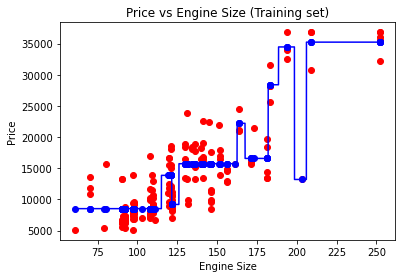

In [13]:
# Visualising the Training set results
X_grid=np.arange(min(X[:, 10:11]), max(X[:, 10:11]), 0.01)
X_grid=X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color='blue')
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], sdt.predict(X_train[:, 10:11]), 'bo')
plt.title('Price vs Engine Size (Training set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

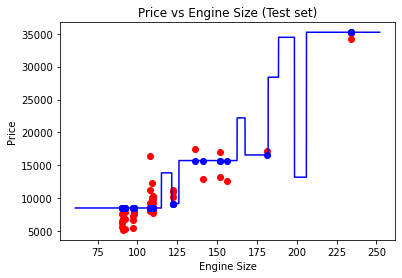

In [14]:
# Visualising the Test set results
X_grid=np.arange(min(X[:, 10:11]), max(X[:, 10:11]), 0.01)
X_grid=X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color='blue')
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], sdt.predict(X_test[:, 10:11]), 'bo')
plt.title('Price vs Engine Size (Test set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [15]:
'''
    Побудуємо модель дерева рішень за всіма факторами, проведемо прогноз за нею, а також перевіримо якість оцінки та прогнозу
цієї моделі.
'''

'\n    Побудуємо модель дерева рішень за всіма факторами, проведемо прогноз за нею, а також перевіримо якість оцінки та прогнозу\nцієї моделі.\n'

In [16]:
# Fitting Tree to the Training set 
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_leaf_nodes=10).fit(X_train, y_train)

In [17]:
# Predicting the Test set results
y_pred=dt.predict(X_test)

In [18]:
# Coefficient of determination R^2
dt_metrics=['dt']
dt_metrics.append(dt.score(X_train, y_train))
dt_metrics.append(dt.score(X_test, y_test))
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.9284674764713187, 0.8828203730140474)

In [19]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
dt_metrics.append(mean_squared_error(y_train, dt.predict(X_train)))
dt_metrics.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, dt.predict(X_train)), mean_squared_error(y_test, y_pred)

(4255656.743404737, 4666361.693970262)

In [20]:
'''
    Було графічно відображено залежність реальних і модельних даних моделі дерева рішень за всіма факторами від аргументу
engine-size для навчальної та тестової вибірки для можливості графічного порівняння результатів оцінки та прогнозу цією
моделлю відповідно.
'''

'\n    Було графічно відображено залежність реальних і модельних даних моделі дерева рішень за всіма факторами від аргументу\nengine-size для навчальної та тестової вибірки для можливості графічного порівняння результатів оцінки та прогнозу цією\nмоделлю відповідно.\n'

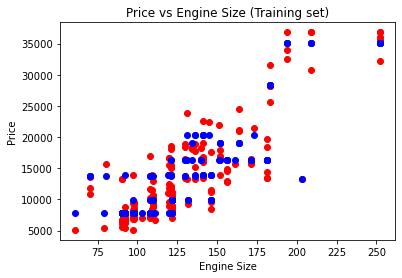

In [21]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], dt.predict(X_train), 'bo')
plt.title('Price vs Engine Size (Training set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

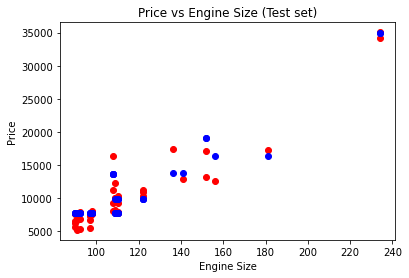

In [22]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], dt.predict(X_test), 'bo')
plt.title('Price vs Engine Size (Test set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [23]:
'''
    Побудуємо модель випадкового лісу, проведемо прогноз за нею, а також перевіримо якість оцінки та прогнозу цієї моделі.
'''

'\n    Побудуємо модель випадкового лісу, проведемо прогноз за нею, а також перевіримо якість оцінки та прогнозу цієї моделі.\n'

In [24]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10, random_state=123).fit(X_train, y_train)

<ipython-input-24-7b656791511d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=10, random_state=123).fit(X_train, y_train)


In [25]:
# Predicting the Test set results
y_pred=rf.predict(X_test)

In [26]:
# Coefficient of determination R^2
rf_metrics=['rf']
rf_metrics.append(rf.score(X_train, y_train))
rf_metrics.append(rf.score(X_test, y_test))
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9719758859534974, 0.9084518698548177)

In [27]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
rf_metrics.append(mean_squared_error(y_train, rf.predict(X_train)))
rf_metrics.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, y_pred)

(1667227.773281674, 3645656.66107893)

In [28]:
'''
    Було графічно відображено залежність реальних і модельних даних моделі випадкового лісу від аргументу engine-size для
навчальної та тестової вибірки для можливості графічного порівняння результатів оцінки та прогнозу моделлю відповідно.
'''

'\n    Було графічно відображено залежність реальних і модельних даних моделі випадкового лісу від аргументу engine-size для\nнавчальної та тестової вибірки для можливості графічного порівняння результатів оцінки та прогнозу моделлю відповідно.\n'

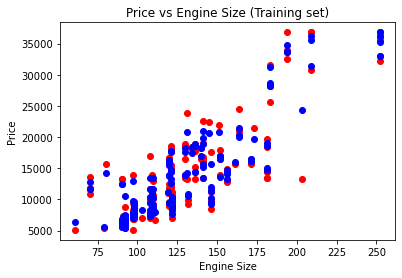

In [29]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], rf.predict(X_train), 'bo')
plt.title('Price vs Engine Size (Training set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

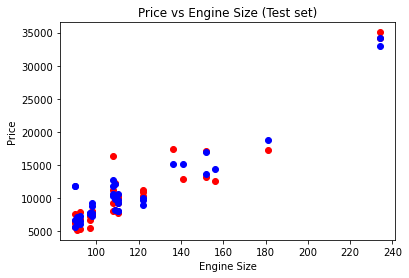

In [30]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], rf.predict(X_test), 'bo')
plt.title('Price vs Engine Size (Test set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [31]:
'''
    Побудуємо модель дерева рішень за оптимальним набором факторів, значущих за p-значенням з рівнем значущості SL=0,05. Ці
фактори були визначені за методом зворотного виключення (Backward Elimination), що було пророблено в попередній лабораторній
роботі. Для побудованої моделі проведемо прогноз за нею, а також перевіримо якість оцінки та прогнозу цієї моделі.
'''

'\n    Побудуємо модель дерева рішень за оптимальним набором факторів, значущих за p-значенням з рівнем значущості SL=0,05. Ці\nфактори були визначені за методом зворотного виключення (Backward Elimination), що було пророблено в попередній лабораторній\nроботі. Для побудованої моделі проведемо прогноз за нею, а також перевіримо якість оцінки та прогнозу цієї моделі.\n'

In [32]:
# Fitting Tree to the Optimized Training set 
opt_columns=[1, 2, 4, 6, 7, 8, 9, 10, 12, 15, 17, 22, 23, 24, 26, 27, 29, 31, 32, 34, 35, 36, 37, 38, 39, 40, 43]
from sklearn.tree import DecisionTreeRegressor
odt=DecisionTreeRegressor(max_leaf_nodes=10).fit(X_train[:, opt_columns], y_train)

In [33]:
# Predicting the Test set results
y_pred=odt.predict(X_test[:, opt_columns])

In [34]:
# Coefficient of determination R^2
odt_metrics=['odt']
odt_metrics.append(odt.score(X_train[:, opt_columns], y_train))
odt_metrics.append(odt.score(X_test[:, opt_columns], y_test))
odt.score(X_train[:, opt_columns], y_train), odt.score(X_test[:, opt_columns], y_test)

(0.928212144522148, 0.8869860870982358)

In [35]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
odt_metrics.append(mean_squared_error(y_train, odt.predict(X_train[:, opt_columns])))
odt_metrics.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, odt.predict(X_train[:, opt_columns])), mean_squared_error(y_test, y_pred)

(4270847.108258278, 4500473.398107879)

In [36]:
'''
    Було графічно відображено залежність реальних і модельних даних моделі дерева рішень по оптимальному набору факторів від
аргументу engine-size для навчальної та тестової вибірки для можливості графічного порівняння результатів оцінки та прогнозу
моделлю відповідно.
'''

'\n    Було графічно відображено залежність реальних і модельних даних моделі дерева рішень по оптимальному набору факторів від\nаргументу engine-size для навчальної та тестової вибірки для можливості графічного порівняння результатів оцінки та прогнозу\nмоделлю відповідно.\n'

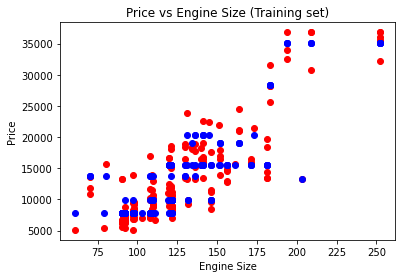

In [37]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], odt.predict(X_train[:, opt_columns]), 'bo')
plt.title('Price vs Engine Size (Training set)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

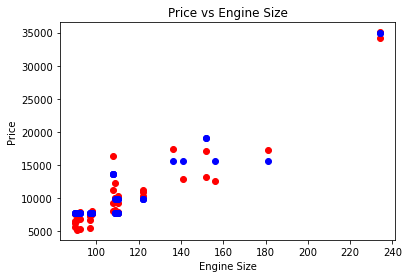

In [38]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], odt.predict(X_test[:, opt_columns]), 'bo')
plt.title('Price vs Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [39]:
'''
    Для визначення найкращої з розглядуваних моделей порівняємо метрики якості між ними, а також з моделями з попередньої
лабораторної роботи. Для цього імпортуємо датасет з метриками якості моделей з попередньої роботи й доповнимо його метриками
з цієї роботи.
'''

'\n    Для визначення найкращої з розглядуваних моделей порівняємо метрики якості між ними, а також з моделями з попередньої\nлабораторної роботи. Для цього імпортуємо датасет з метриками якості моделей з попередньої роботи й доповнимо його метриками\nз цієї роботи.\n'

In [40]:
metrics_df=pd.read_csv('Metrics (Tomilovych, EC-61).csv', sep=';')
for to_append in [sdt_metrics, dt_metrics, rf_metrics, odt_metrics]:
    a_series=pd.Series(to_append, index=metrics_df.columns)
    metrics_df=metrics_df.append(a_series, ignore_index=True)
metrics_df.iloc[4:]

,model,train_r2,test_r2,train_mse,test_mse
4,sdt,0.866935,0.877774,7.916376e+06,4.867335e+06
5,dt,0.928467,0.882820,4.255657e+06,4.666362e+06
6,rf,0.971976,0.908452,1.667228e+06,3.645657e+06
7,odt,0.928212,0.886986,4.270847e+06,4.500473e+06


In [41]:
'''
    З розглянутих даних можна побачити, що найкращий коефіцієнт детермінації, як для навчальної, так і для тестової вибірки,
має модель випадкового лісу rf, хоча значення цієї метрики в інших моделей теж доволі високі.
    Результати по середньоквадратичній помилці MSE повторюють висновки по коефіцієнту детермінації. Таким чином, найкращою з
розглядуваних моделей для прогнозування ціни автомобіля є модель випадкового лісу rf. Проте її варто порівняти з моделями
лінійної регресії.
'''

'\n    З розглянутих даних можна побачити, що найкращий коефіцієнт детермінації, як для навчальної, так і для тестової вибірки,\nмає модель випадкового лісу rf, хоча значення цієї метрики в інших моделей теж доволі високі.\n    Результати по середньоквадратичній помилці MSE повторюють висновки по коефіцієнту детермінації. Таким чином, найкращою з\nрозглядуваних моделей для прогнозування ціни автомобіля є модель випадкового лісу rf. Проте її варто порівняти з моделями\nлінійної регресії.\n'

In [42]:
metrics_df

,model,train_r2,test_r2,train_mse,test_mse
0,sr,0.712345,0.859868,1.719428e+07,5.580358e+06
1,mr,0.943201,0.875247,3.395103e+06,4.967967e+06
2,pr,0.724615,0.870935,1.646086e+07,5.139649e+06
3,omr,0.933351,0.914482,3.983876e+06,3.405523e+06
4,sdt,0.866935,0.877774,7.916376e+06,4.867335e+06
5,dt,0.928467,0.882820,4.255657e+06,4.666362e+06
6,rf,0.971976,0.908452,1.667228e+06,3.645657e+06
7,odt,0.928212,0.886986,4.270847e+06,4.500473e+06


In [43]:
'''
    Найкращою моделлю серед лінійних у попередній лабораторній роботі була обрана оптимізована багатофакторна лінійна модель
omr. Порівняно з моделлю випадкового лісу rf вона має менший коефіцієнт детермінації для навчальної вибірки та більше
значення MSE.
    З іншого боку, вона має більший коефіцієнт детермінації для тестової вибірки та менше значення MSE. Разом з тим, модель
omr, на відміну від моделі випадкового лісу, побудована не на всій множині факторів, а тільки на значущих за p-значенням з
рівнем значущості SL=0,05; тобто є простішою.
    Таким чином, для прогнозування ціни автомобіля оптимальнішою є оптимізована багатофакторна лінійна модель omr - простіша
та така, що має кращі прогнозні якості.
    Метрики якості моделей з цієї лабораторної роботи доповнили датасет метрик якості з попередньої роботи та будуть
експортовані для подальшого порівняння з інишими типами моделей.
'''

'\n    Найкращою моделлю серед лінійних у попередній лабораторній роботі була обрана оптимізована багатофакторна лінійна модель\nomr. Порівняно з моделлю випадкового лісу rf вона має менший коефіцієнт детермінації для навчальної вибірки та більше\nзначення MSE.\n    З іншого боку, вона має більший коефіцієнт детермінації для тестової вибірки та менше значення MSE. Разом з тим, модель\nomr, на відміну від моделі випадкового лісу, побудована не на всій множині факторів, а тільки на значущих за p-значенням з\nрівнем значущості SL=0,05; тобто є простішою.\n    Таким чином, для прогнозування ціни автомобіля оптимальнішою є оптимізована багатофакторна лінійна модель omr - простіша\nта така, що має кращі прогнозні якості.\n    Метрики якості моделей з цієї лабораторної роботи доповнили датасет метрик якості з попередньої роботи та будуть\nекспортовані для подальшого порівняння з інишими типами моделей.\n'

In [44]:
# Exporting dataset with metrics
metrics_df.to_csv('Metrics_after_LR3 (Tomilovych, EC-61).csv', sep=';', index=False)